In [ ]:
# Do not use this code under normal circumstances and every time 
%pip install opencv-python matplotlib pillow

In [1]:
!pip list # Do not use this code under normal circumstances and every time

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.6.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.0
gast                         0.4.0
google-auth                  2.30.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.64.1
h5py                         3.11.0
idna                         3.7
importlib_metadata           7.1.0
ipykernel                    6.29.4
ipython                      8.25.0
jedi

In [15]:
import tensorflow as tf # type: ignore
import os

In [3]:
# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available: ", len(gpus))
    print("GPU Details: ", gpus)
else:
    print("No GPUs Available.")

GPUs Available:  1
GPU Details:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# Check CPU availability
cpu = tf.config.list_physical_devices('CPU')
if gpus:
    print("CPUs Available: ", len(cpu))
    print("CPU Details: ", cpu)
else:
    print("No CPUs Available.")

CPUs Available:  1
CPU Details:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [16]:
import cv2 # type: ignore
import imghdr
from matplotlib import pyplot as plt # type: ignore

In [6]:
data_dir = r'training 4 classes\no Glioma - Glioma' #use data2 only if u are on this file

In [7]:
os.listdir(data_dir)

['AA no Glioma', 'Glioma']

In [8]:
os.listdir(os.path.join(data_dir,'Glioma'))

['gg (1).jpg',
 'gg (10).jpg',
 'gg (100).jpg',
 'gg (101).jpg',
 'gg (102).jpg',
 'gg (103).jpg',
 'gg (104).jpg',
 'gg (105).jpg',
 'gg (106).jpg',
 'gg (107).jpg',
 'gg (108).jpg',
 'gg (109).jpg',
 'gg (11).jpg',
 'gg (110).jpg',
 'gg (111).jpg',
 'gg (112).jpg',
 'gg (113).jpg',
 'gg (114).jpg',
 'gg (115).jpg',
 'gg (116).jpg',
 'gg (117).jpg',
 'gg (118).jpg',
 'gg (119).jpg',
 'gg (12).jpg',
 'gg (120).jpg',
 'gg (121).jpg',
 'gg (122).jpg',
 'gg (123).jpg',
 'gg (124).jpg',
 'gg (125).jpg',
 'gg (126).jpg',
 'gg (127).jpg',
 'gg (128).jpg',
 'gg (129).jpg',
 'gg (13).jpg',
 'gg (130).jpg',
 'gg (131).jpg',
 'gg (132).jpg',
 'gg (133).jpg',
 'gg (134).jpg',
 'gg (135).jpg',
 'gg (136).jpg',
 'gg (137).jpg',
 'gg (138).jpg',
 'gg (139).jpg',
 'gg (14).jpg',
 'gg (140).jpg',
 'gg (141).jpg',
 'gg (142).jpg',
 'gg (143).jpg',
 'gg (144).jpg',
 'gg (145).jpg',
 'gg (146).jpg',
 'gg (147).jpg',
 'gg (148).jpg',
 'gg (149).jpg',
 'gg (15).jpg',
 'gg (150).jpg',
 'gg (151).jpg',
 'gg 

In [9]:
image_exts = ['jpeg','jpg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [17]:
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [13]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32) # the smaller batch size the better. the greater batch size the faster. the ideal batch size is 32

Found 2870 files belonging to 2 classes.


In [30]:
# Assuming 'data' is your dataset
data_iterator = data.as_numpy_iterator()

In [31]:
#get another batch from the iterator
batch = data_iterator.next()

In [32]:
# images as numpy arrays
batch[0].shape # Should print something like (256, height, width, channels)

(32, 256, 256, 3)

In [33]:
#class 0 = class one no Brain Tumor 
#class 1 = class two Brain Tumor
batch[1] # Should print the labels for the 256 images

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

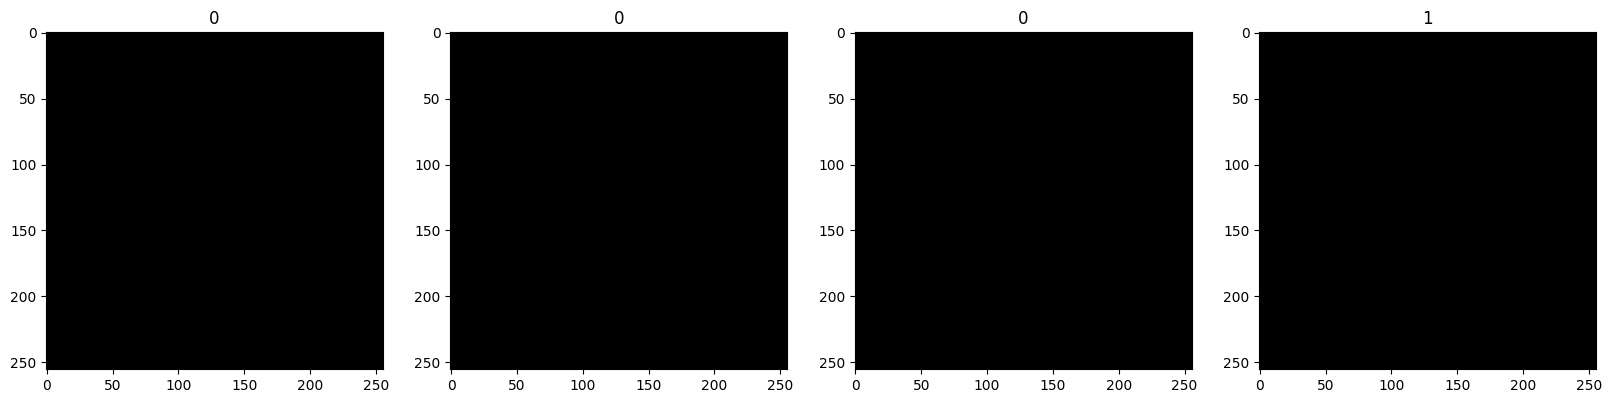

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [35]:
scaled = batch[0] / 255

In [36]:
scaled.max()

0.003921569

In [37]:
scaled.min()

0.0

In [38]:
if batch[0].max() == 255:
    data = data.map(lambda x, y: (x / 255, y))
    batch = data.as_numpy_iterator().next()
    print('have been changed')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))
else:
    print('no changes')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))

no changes
batch[0].max() = 1.0
batch[0].min() = 0.0


In [39]:
scaled_iterator = data.as_numpy_iterator()

In [40]:
batch = scaled_iterator.next()

In [41]:
batch[0].max()

1.0

In [42]:
batch[0].min()

0.0

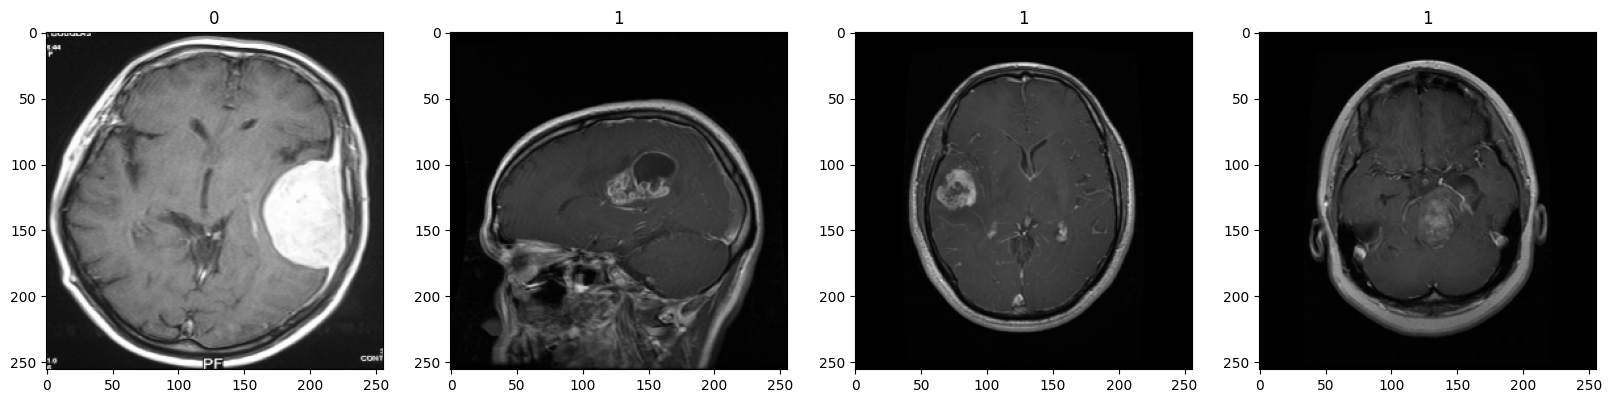

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [44]:
len(data)

90

In [45]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)
test_size = int(len(data)*0.2)+1

In [46]:
train_size + val_size + test_size

90

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [18]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # type: ignore

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [51]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [53]:
from datetime import datetime

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('(%H.%M.%S)') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)

Formatted date with microseconds: 17.Jun.2024.(17.58.55).184411


In [54]:
logdir = fr'log_for_no Glioma - Glioma_{str(formatted_date)}' # change it to any log file if u were working on this file

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
batch[0].max()

1.0

In [57]:
batch[0].min()

0.0

In [58]:
hist = model.fit(train, epochs=32, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/32
62/62 [==============================] - 15s 111ms/step - loss: 0.4734 - accuracy: 0.7480 - val_loss: 0.4317 - val_accuracy: 0.8090
Epoch 2/32
62/62 [==============================] - 7s 115ms/step - loss: 0.3365 - accuracy: 0.8347 - val_loss: 0.3689 - val_accuracy: 0.8264
Epoch 3/32
62/62 [==============================] - 7s 110ms/step - loss: 0.2186 - accuracy: 0.9022 - val_loss: 0.3539 - val_accuracy: 0.8368
Epoch 4/32
62/62 [==============================] - 7s 113ms/step - loss: 0.1513 - accuracy: 0.9446 - val_loss: 0.1873 - val_accuracy: 0.9167
Epoch 5/32
62/62 [==============================] - 8s 116ms/step - loss: 0.0842 - accuracy: 0.9703 - val_loss: 0.2062 - val_accuracy: 0.9340
Epoch 6/32
62/62 [==============================] - 7s 114ms/step - loss: 0.0492 - accuracy: 0.9814 - val_loss: 0.2104 - val_accuracy: 0.9201
Epoch 7/32
62/62 [==============================] - 7s 108ms/step - loss: 0.0366 - accuracy: 0.9879 - val_loss: 0.1884 - val_accuracy: 0.9410
Epoch

In [59]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

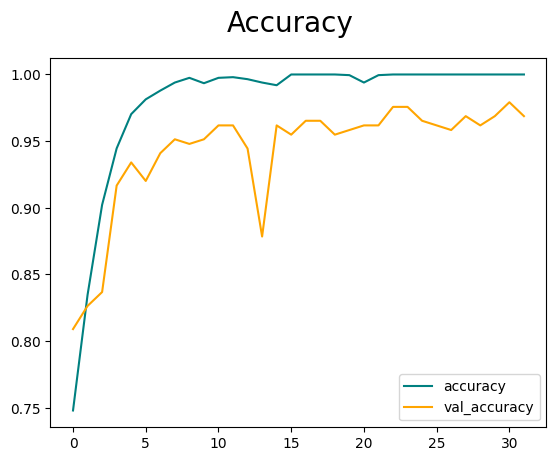

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

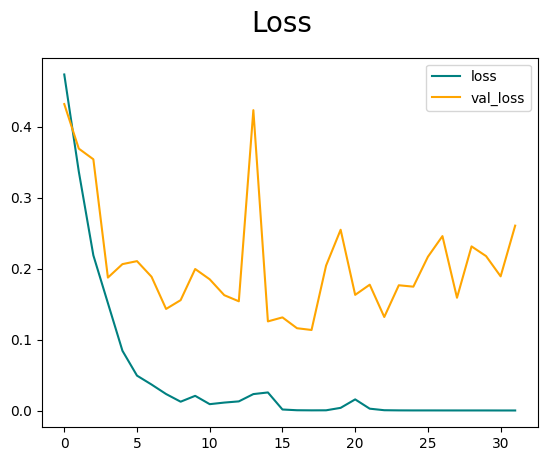

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

In [20]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [63]:
Precision = Precision()
Recall = Recall()
BinAccuracy = BinaryAccuracy()

In [64]:
len(test)

19

In [65]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    Precision.update_state(y, yhat)
    Recall.update_state(y, yhat)
    BinAccuracy.update_state(y, yhat)

1/1 [==============================] - 0s 230ms/step


In [66]:
print(f'Precision: {Precision.result().numpy()}, Recall {Recall.result().numpy()}, Accuracy{BinAccuracy.result().numpy()}')

Precision: 0.907608687877655, Recall 0.9027026891708374, Accuracy0.9414715766906738


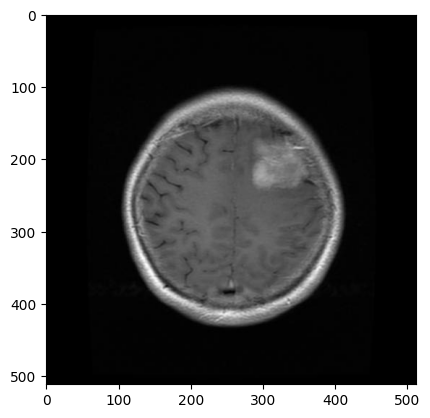

In [23]:
img = cv2.imread(r'training 4 classes\no Glioma - Glioma\AA no Glioma\m (177).jpg') # change this to image dir
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

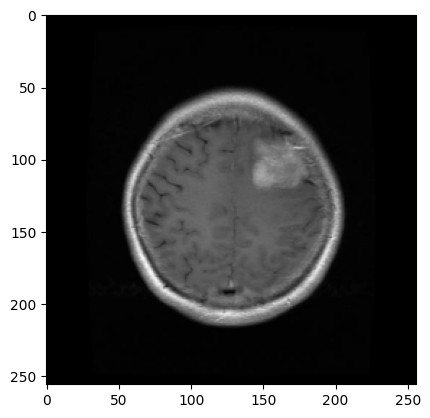

In [24]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
np.expand_dims(resize, 0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [70]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 423ms/step


In [71]:
if yhat > 0.5 and yhat <= 1: 
    print(f'Image has been Classified as Glioma')
elif yhat < 0.5 and yhat >= 0:
    print(f'Image has been Classified as no Glioma')
elif yhat == 0.5:
    print(f'Neutral')
else:
    print(f'Bugged Code?!')

Image has been Classified as no Glioma


In [9]:
from tensorflow.keras.models import load_model # type: ignore
from datetime import datetime
#import os
#import tensorflow as tf

In [73]:
from datetime import datetime

num_epochs = len(hist.epoch)

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('%H.%M.%S') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)
print("len(hist.epochs) = " + str(num_epochs))

Formatted date with microseconds: 17.Jun.2024.18.03.42.682073
len(hist.epochs) = 32


In [74]:
model.save(os.path.join(r'models',f'Glioma_{formatted_date}_{num_epochs}epochs.h5')) # choose the dir that u want to save ur model at

In [34]:
new_model = load_model(os.path.join(r'models', fr'Glioma_17.Jun.2024.10.44.42.828487_512epochs.h5')) # choose the dir that u want to load ur model from

In [35]:
yhattest = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 446ms/step


In [36]:
if yhattest > 0.5 and yhattest <= 1: 
    print(f'Image has been Classified as Glioma')
elif yhattest < 0.5 and yhattest >= 0:
    print(f'Image has been Classified as no Glioma')
elif yhattest == 0.5:
    print(f'Neutral')
else:
    print(f'Bugged Code?!')

Image has been Classified as no Glioma


In [37]:
import pandas as pd

# Extracting the metrics
epochs = range(1, len(hist.history['accuracy']) + 1)
accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
validation_loss = hist.history['val_loss']

# Creating a DataFrame with the desired columns
df = pd.DataFrame({
    'Epochs': epochs,
    'Accuracy': accuracy,
    'Validation Accuracy': validation_accuracy,
    'Loss': loss,
    'Validation Loss': validation_loss
})

# Saving the DataFrame to a CSV file
df.to_csv(rf'training metrics/training_metrics_Glioma.csv', index=False)

NameError: name 'hist' is not defined

In [38]:
# Define the folder path
folder_path_Positive = r'testing/glioma'
folder_path_Negative = r'testing/no glioma'

In [39]:
def predict_folder_brain_tumor(folder_path, model):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Array to store names of images with incorrect predictions
    incorrect_predictions: list = []
    
    for file in files:
        # Construct full file path
        file_path = os.path.join(folder_path, file)
        
        # Read the image
        img = cv2.imread(file_path)
        if img is None:
            continue  # Skip if the file is not an image

        # Resize the image
        resize = tf.image.resize(img, (256, 256))

        # Prepare the image for prediction
        img_expanded = np.expand_dims(resize / 255.0, 0)

        # Make a prediction
        yhat = model.predict(img_expanded)

        # Interpret and print the prediction
        if yhat > 0.5 and yhat <= 1:
            print(f'Predicted class for {file} is Glioma Tumor')
        elif yhat < 0.5 and yhat >= 0:
            print(f'Predicted class for {file} is No Glioma Tumor')
            # Add incorrect prediction to the array
            incorrect_predictions.append(file)

    print(f'True Positive Percentage of Glioma Prediction is: {float((len(files)-len(incorrect_predictions))/len(files)) * 100:.3f}%')

    
    # Return the array of incorrect predictions
    return incorrect_predictions


In [40]:
def predict_folder_no_tumor(folder_path, model):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Array to store names of images with incorrect predictions
    incorrect_predictions: list = []
    
    for file in files:
        # Construct full file path
        file_path = os.path.join(folder_path, file)
        
        # Read the image
        img = cv2.imread(file_path)
        if img is None:
            continue  # Skip if the file is not an image

        # Resize the image
        resize = tf.image.resize(img, (256, 256))

        # Prepare the image for prediction
        img_expanded = np.expand_dims(resize / 255.0, 0)

        # Make a prediction
        yhat = model.predict(img_expanded)

        # Interpret and print the prediction
        if yhat > 0.5 and yhat <= 1:
            print(f'Predicted class for {file} is Glioma Tumor')
            # Add incorrect prediction to the array
            incorrect_predictions.append(file)
        elif yhat < 0.5 and yhat >= 0:
            print(f'Predicted class for {file} is No Glioma Tumor')

    print(f'True Negative Percentage of Glioma Prediction is: {float((len(files)-len(incorrect_predictions))/len(files)) * 100:.3f}%')

    
    # Return the array of incorrect predictions
    return incorrect_predictions

In [41]:
# Call the function to predict all images in the folder
predict_folder_brain_tumor(folder_path_Positive, new_model)

1/1 [==============================] - 0s 42ms/step
Predicted class for gg test 1.jpg is No Glioma Tumor
1/1 [==============================] - 0s 50ms/step
Predicted class for gg test 10.jpg is No Glioma Tumor
1/1 [==============================] - 0s 30ms/step
Predicted class for gg test 100.jpg is No Glioma Tumor
1/1 [==============================] - 0s 22ms/step
Predicted class for gg test 11.jpg is No Glioma Tumor
1/1 [==============================] - 0s 23ms/step
Predicted class for gg test 12.jpg is No Glioma Tumor
1/1 [==============================] - 0s 20ms/step
Predicted class for gg test 13.jpg is No Glioma Tumor
1/1 [==============================] - 0s 21ms/step
Predicted class for gg test 14.jpg is No Glioma Tumor
1/1 [==============================] - 0s 21ms/step
Predicted class for gg test 15.jpg is No Glioma Tumor
1/1 [==============================] - 0s 25ms/step
Predicted class for gg test 16.jpg is No Glioma Tumor
1/1 [==============================] - 0s 28ms

['gg test 1.jpg',
 'gg test 10.jpg',
 'gg test 100.jpg',
 'gg test 11.jpg',
 'gg test 12.jpg',
 'gg test 13.jpg',
 'gg test 14.jpg',
 'gg test 15.jpg',
 'gg test 16.jpg',
 'gg test 17.jpg',
 'gg test 18.jpg',
 'gg test 19.jpg',
 'gg test 2.jpg',
 'gg test 20.jpg',
 'gg test 21.jpg',
 'gg test 22.jpg',
 'gg test 23.jpg',
 'gg test 24.jpg',
 'gg test 25.jpg',
 'gg test 26.jpg',
 'gg test 27.jpg',
 'gg test 28.jpg',
 'gg test 29.jpg',
 'gg test 3.jpg',
 'gg test 30.jpg',
 'gg test 31.jpg',
 'gg test 32.jpg',
 'gg test 33.jpg',
 'gg test 34.jpg',
 'gg test 35.jpg',
 'gg test 36.jpg',
 'gg test 37.jpg',
 'gg test 38.jpg',
 'gg test 39.jpg',
 'gg test 4.jpg',
 'gg test 40.jpg',
 'gg test 41.jpg',
 'gg test 42.jpg',
 'gg test 43.jpg',
 'gg test 44.jpg',
 'gg test 45.jpg',
 'gg test 46.jpg',
 'gg test 47.jpg',
 'gg test 48.jpg',
 'gg test 49.jpg',
 'gg test 5.jpg',
 'gg test 50.jpg',
 'gg test 51.jpg',
 'gg test 52.jpg',
 'gg test 54.jpg',
 'gg test 57.jpg',
 'gg test 6.jpg',
 'gg test 66.jpg'

In [42]:
# Call the function to predict all images in the folder
predict_folder_no_tumor(folder_path_Negative, new_model)

1/1 [==============================] - 0s 23ms/step
Predicted class for m test 1.jpg is No Glioma Tumor
1/1 [==============================] - 0s 26ms/step
Predicted class for m test 10.jpg is No Glioma Tumor
1/1 [==============================] - 0s 27ms/step
Predicted class for m test 100.jpg is No Glioma Tumor
1/1 [==============================] - 0s 22ms/step
Predicted class for m test 101.jpg is No Glioma Tumor
1/1 [==============================] - 0s 26ms/step
Predicted class for m test 102.jpg is No Glioma Tumor
1/1 [==============================] - 0s 26ms/step
Predicted class for m test 103.jpg is No Glioma Tumor
1/1 [==============================] - 0s 22ms/step
Predicted class for m test 104.jpg is No Glioma Tumor
1/1 [==============================] - 0s 20ms/step
Predicted class for m test 105.jpg is No Glioma Tumor
1/1 [==============================] - 0s 26ms/step
Predicted class for m test 106.jpg is No Glioma Tumor
1/1 [==============================] - 0s 28ms/st

['m test 38.jpg']